In [3]:
%load_ext autoreload
%autoreload 2
import os
from encoding_information.gpu_utils import limit_gpu_memory_growth  
limit_gpu_memory_growth()
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

from animations.annimations_utils import *
from tqdm import tqdm

from bsccm import BSCCM
from encoding_information.datasets.bsccm_utils import *
from jax.scipy.stats import multivariate_normal
from matplotlib.colors import LinearSegmentedColormap

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')


purple = get_color_cycle()[1]
green = get_color_cycle()[3]
magenta = get_color_cycle()[4]
# green = '#89E642'
image_green = 'lime'
green_cmap = LinearSegmentedColormap.from_list(f'cmap', [(0,0,0), image_green], N=65536)


save_dir = '/home/hpinkard_waller/figures/animations/'

def setup_frames_dir(name):
    """
    Clear any existing frames and make the dir if needed
    """
    saving_dir = save_dir + name

    # make dir if needed
    os.makedirs(saving_dir, exist_ok=True)

    # delete all files in the directory
    for file in os.listdir(saving_dir):
        os.remove(os.path.join(saving_dir, file))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Opening BSCCM
Opened BSCCM


# Intro 2 point resolution

### Show one point and one convolved point

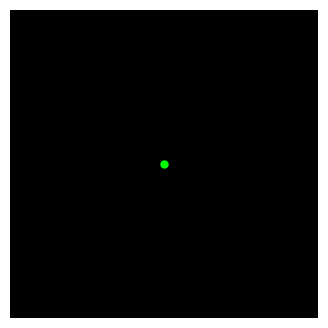

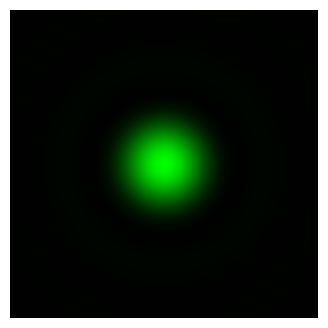

In [6]:

wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
seperation_distance = 200 # nm


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# plot a black image of the same size
ax.imshow(np.zeros((num_pixels, num_pixels)), cmap=green_cmap, extent=[0, size, 0, size])
# plot two circles at the two points
ax.plot(size/2, size/2, 'o', color=image_green, markersize=5)
ax.axis('off')
fig.savefig(save_dir + 'one_point.png', dpi=600)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, seperation_distance, pixel_size)

# plot the convolved image
ax.imshow(dither_image(one_point_convolved.T), cmap=green_cmap,
          extent=[0, size, 0, size])


ax.axis('off')
fig.savefig(save_dir + 'one_point_convolved.png')

### Nooisy measurements for figure 3

100%|██████████| 25/25 [01:09<00:00,  2.77s/it]


0.94254196


100%|██████████| 25/25 [01:09<00:00,  2.76s/it]


1.011225


100%|██████████| 25/25 [01:08<00:00,  2.74s/it]

0.72187585


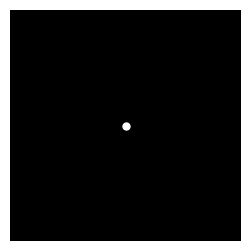

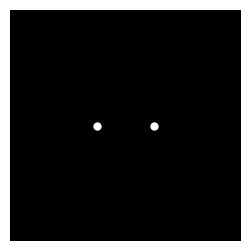

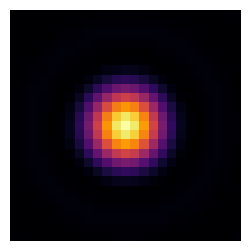

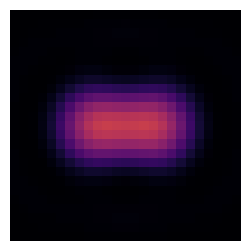

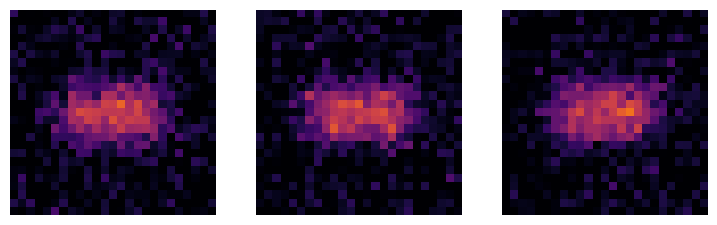

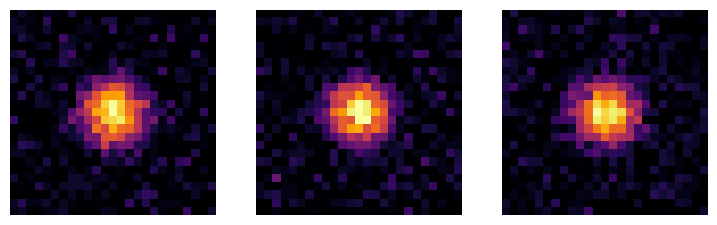

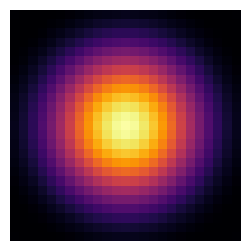

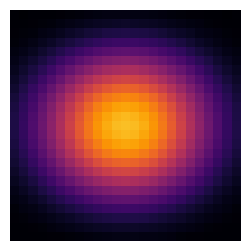

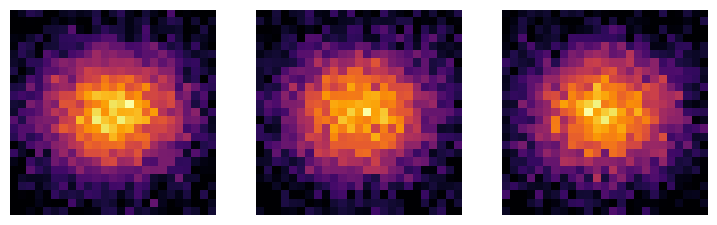

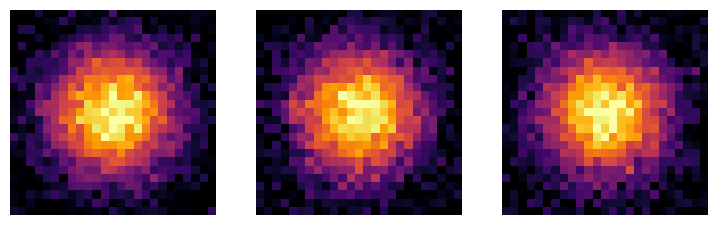

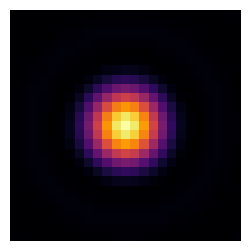

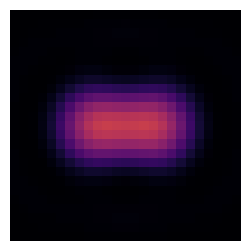

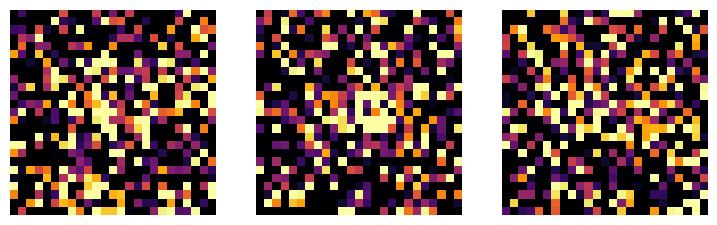

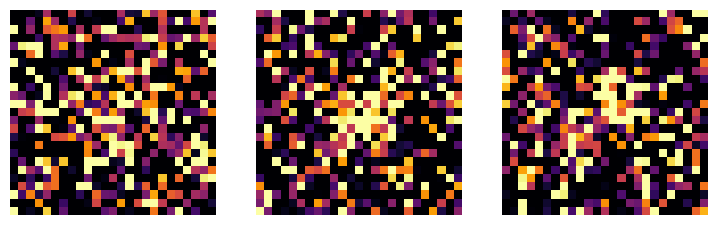

In [55]:
wavelength = 400 # nm
NA = .3
pixel_size = 80 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
seperation_distance = 500 # nm
snr = 2


fig, ax = plt.subplots(1, 1, figsize=(3, 3))

# plot a black image of the same size
ax.imshow(np.zeros((num_pixels, num_pixels)), cmap=green_cmap, extent=[0, size, 0, size])
# plot two circles at the two points
ax.plot(size/2, size/2, 'o', color='w', markersize=5)
ax.axis('off')
fig.savefig(save_dir + 'one_point.pdf', dpi=600)

# plot two points
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(np.zeros((num_pixels, num_pixels)), cmap=green_cmap, extent=[0, size, 0, size])
ax.plot(size/2 - seperation_distance / 2, size/2, 'o', color='w', markersize=5)
ax.plot(size/2 + seperation_distance / 2, size/2, 'o', color='w', markersize=5)
ax.axis('off')
fig.savefig(save_dir + 'two_point.pdf', dpi=600)

for k, (snr, NA) in enumerate([(1, .4), (4, 0.2), (.1, .4)]):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
    x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, seperation_distance, pixel_size)

    vmin, vmax = one_point_noiseless_pixels.min(), one_point_noiseless_pixels.max()

    # plot the convolved image
    ax.imshow(one_point_noiseless_pixels, cmap='inferno',
            extent=[0, size, 0, size], interpolation='none', vmin=vmin, vmax=vmax)
    ax.axis('off')
    fig.savefig(save_dir + f'one_point_convolved_inferno_{k}.pdf', dpi=600)


    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.imshow(two_point_noiseless_pixels.T, cmap='inferno',
                extent=[0, size, 0, size], interpolation='none', vmin=vmin, vmax=vmax)
    ax.axis('off')
    fig.savefig(save_dir + f'two_point_convolved_inferno_{k}.pdf', dpi=600)

    # plot 1x3 noisy measurements of each
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    for i in range(3):
        noise = (1 / (snr * num_pixels ** 2)) * random.normal(random.PRNGKey(onp.random.randint(10000)), 
                two_point_noiseless_pixels.shape, np.float32)
        noisy_image = two_point_noiseless_pixels + noise
        ax[i].imshow(noisy_image.T, cmap='inferno', extent=[0, size, 0, size], interpolation='none', vmin=vmin, vmax=vmax)
        ax[i].axis('off')

    fig.savefig(save_dir + f'one_point_noisy_inferno{k}.pdf', dpi=600)

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    for i in range(3):
        noise = (1 / (snr * num_pixels ** 2)) * random.normal(random.PRNGKey(onp.random.randint(10000)),
                            one_point_noiseless_pixels.shape, np.float32)
        noisy_image = one_point_noiseless_pixels + noise
        ax[i].imshow(noisy_image.T, cmap='inferno', extent=[0, size, 0, size], interpolation='none', vmin=vmin, vmax=vmax)
        ax[i].axis('off')

    fig.savefig(save_dir + f'two_point_noisy_inferno{k}.pdf', dpi=600)

    mis = []
    for i in tqdm(range(25)):
        mi = estimate_2_point_1_point_mi(one_point_noiseless_pixels.flatten(), two_point_noiseless_pixels.flatten(), snr, num_measurements=int(4e5))
        mis.append(mi)
    print(onp.mean(mi))



### debgug rayleigh dist and 1d 2d stuff

rayleigh_dist 488.0


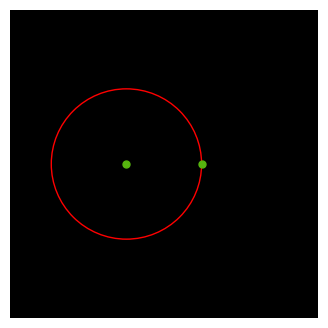

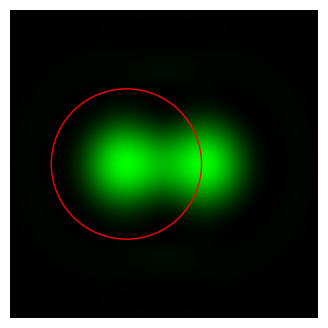

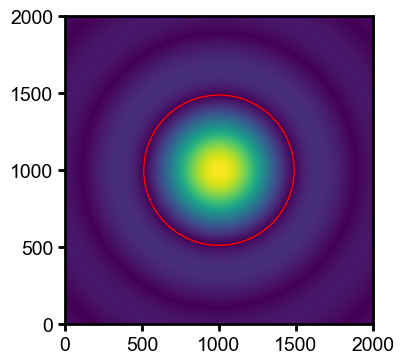

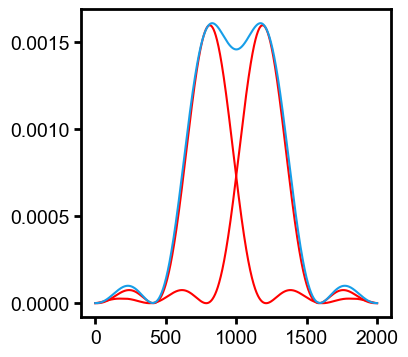

In [41]:
# plot convolved image at rayleigh distance


wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)

rayleigh_dist = 0.61 * wavelength / NA

print(f'rayleigh_dist {rayleigh_dist}')


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# plot a black image of the same size
ax.imshow(np.zeros((num_pixels, num_pixels)), cmap=green_cmap, extent=[0, size, 0, size])
# plot two circles at the two points
ax.plot(size/2 - rayleigh_dist/2, size/2, 'o', color=green, markersize=5)
ax.plot(size/2 + rayleigh_dist/2, size/2, 'o', color=green, markersize=5)
ax.axis('off')
circle = plt.Circle((size / 2 - rayleigh_dist / 2, size / 2), rayleigh_dist, color='red', fill=False)
ax.add_artist(circle)


# plot the convolved image
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, rayleigh_dist, pixel_size)
ax.imshow(two_point_convolved.T, cmap=green_cmap, extent=[0, size, 0, size]) 
ax.axis('off')

circle = plt.Circle((size / 2 - rayleigh_dist / 2, size / 2), rayleigh_dist, color='red', fill=False)
ax.add_artist(circle)

# plot a red point at 1/2 the rayleigh dist from center

# # save the current figure as a png
# fig.savefig(f"{save_dir}{name_conv}/image_{i:04d}.tiff")
# # close the figure
# plt.close(fig)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(np.sqrt(cropped_PSF), extent = [0, size, 0, size], cmap='viridis')
# , extent=[0, cropped_PSF.shape[0]*pixel_size, 0, cropped_PSF.shape[1]*pixel_size])
# draw a red circle at the radius of the rayleigh distance
circle = plt.Circle((size / 2, size / 2), rayleigh_dist, color='red', fill=False)
ax.add_artist(circle)



# # same thing in 1d
rayleigh_dist = 0.5 * wavelength / NA

# seperation_distance = rayleigh_dist

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
x,  cropped_PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)
# plot one psf centered at the first point
step_size = size / cropped_PSF.size

ax.plot(x, np.roll(cropped_PSF * 0.5, -seperation_distance / step_size / 2), color='red')
ax.plot(x, np.roll(cropped_PSF * 0.5, seperation_distance / step_size / 2), color='red')


# plot the convolved image
ax.plot(x, two_point_convolved)


### Two points changing seperation

In [2]:
name_points = '2p_sep_2d_unconv'
name_conv = '2p_sep_2d'

setup_frames_dir(name_points)
setup_frames_dir(name_conv)

# also make subdirs
for sub in ['_up_to_rayleigh', '_up_to_abbe', '_up_to_sparrow', '_beyond_sparrow', '_unres_to_rayleigh']:
    setup_frames_dir(name_points + sub)
    setup_frames_dir(name_conv + sub)

num_frames = 130

wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)

rayleigh_dist = 0.61 * wavelength / NA
abbe_dist = 0.5 * wavelength / NA
sparrow_dist = 0.47 * wavelength / NA

rayleigh_counter = 0
abbe_counter = 0
sparrow_counter = 0
back_to_rayleigh_counter = 0
for i, seperation_distance in tqdm(enumerate(np.linspace(750, 100, num_frames))):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    # plot a black image of the same size
    ax.imshow(np.zeros((num_pixels, num_pixels)), cmap=green_cmap, extent=[0, size, 0, size])
    # plot two circles at the two points
    ax.plot(size/2 - seperation_distance/2, size/2, 'o', color=image_green, markersize=5)
    ax.plot(size/2 + seperation_distance/2, size/2, 'o', color=image_green, markersize=5)
    ax.axis('off')

    if i == 0:
        fig.savefig(f"{save_dir}{name_points}initial.png", dpi = 600)
        

    if seperation_distance > rayleigh_dist:
        fig.savefig(f"{save_dir}{name_points}_up_to_rayleigh/image_{i:04d}.tiff")
    elif seperation_distance > abbe_dist:
        fig.savefig(f"{save_dir}{name_points}_up_to_abbe/image_{rayleigh_counter:04d}.tiff")
    elif seperation_distance > sparrow_dist:
        fig.savefig(f"{save_dir}{name_points}_up_to_sparrow/image_{abbe_counter:04d}.tiff")
    else:
        fig.savefig(f"{save_dir}{name_points}_beyond_sparrow/image_{sparrow_counter:04d}.tiff")
    if seperation_distance < rayleigh_dist:
        fig.savefig(f"{save_dir}{name_points}_unres_to_rayleigh/image_{back_to_rayleigh_counter:04d}.tiff")
        
    fig.savefig(f"{save_dir}{name_points}/image_{i:04d}.tiff")
    # close the figure
    plt.close(fig)


    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
    x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, seperation_distance, pixel_size)

    # plot the convolved image
    ax.imshow(two_point_convolved.T, cmap=green_cmap, extent=[0, size, 0, size]) 
    ax.axis('off')

    if i == 0:
        fig.savefig(f"{save_dir}{name_conv}initial.png", dpi = 600)
  
    if seperation_distance > rayleigh_dist:
        fig.savefig(f"{save_dir}{name_conv}_up_to_rayleigh/image_{i:04d}.tiff")
    elif seperation_distance > abbe_dist:
        fig.savefig(f"{save_dir}{name_conv}_up_to_abbe/image_{rayleigh_counter:04d}.tiff")
        rayleigh_counter += 1
    elif seperation_distance > sparrow_dist:
        fig.savefig(f"{save_dir}{name_conv}_up_to_sparrow/image_{abbe_counter:04d}.tiff")
        abbe_counter += 1
    else:
        fig.savefig(f"{save_dir}{name_conv}_beyond_sparrow/image_{sparrow_counter:04d}.tiff")
        sparrow_counter += 1
    if seperation_distance < rayleigh_dist:
        fig.savefig(f"{save_dir}{name_conv}_unres_to_rayleigh/image_{back_to_rayleigh_counter:04d}.tiff")
        back_to_rayleigh_counter += 1

    fig.savefig(f"{save_dir}{name_conv}/image_{i:04d}.tiff")
    # close the figure
    plt.close(fig)


130it [02:01,  1.07it/s]


In [6]:
!convert -delay 3 '{save_dir}{name_points}/image_*.tiff' -duplicate 1,-2-1 -layers OptimizePlus -loop 1 '{save_dir}{name_points}.gif'
!convert -delay 3 '{save_dir}{name_conv}/image_*.tiff' -duplicate 1,-2-1 -layers OptimizePlus -loop 1 '{save_dir}{name_conv}.gif'

!convert -delay 3 '{save_dir}{name_points}_up_to_rayleigh/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_points}_up_to_rayleigh.gif'
!convert -delay 3 '{save_dir}{name_conv}_up_to_rayleigh/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_conv}_up_to_rayleigh.gif'

!convert -delay 3 '{save_dir}{name_points}_up_to_abbe/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_points}_up_to_abbe.gif'
!convert -delay 3 '{save_dir}{name_conv}_up_to_abbe/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_conv}_up_to_abbe.gif'

!convert -delay 3 '{save_dir}{name_points}_up_to_sparrow/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_points}_up_to_sparrow.gif'
!convert -delay 3 '{save_dir}{name_conv}_up_to_sparrow/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_conv}_up_to_sparrow.gif'

!convert -delay 3 '{save_dir}{name_points}_beyond_sparrow/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_points}_beyond_sparrow.gif'
!convert -delay 3 '{save_dir}{name_conv}_beyond_sparrow/image_*.tiff'  -layers OptimizePlus -loop 1 '{save_dir}{name_conv}_beyond_sparrow.gif'

files = sorted([os.path.join(f'{save_dir}{name_points}_unres_to_rayleigh', f) for f in os.listdir(f'{save_dir}{name_points}_unres_to_rayleigh') if f.endswith('.tiff')], reverse=True)
!convert -delay 3 {' '.join(files)} -layers OptimizePlus -loop 1 '{save_dir}{name_points}_unres_to_rayleigh.gif'
files = sorted([os.path.join(f'{save_dir}{name_conv}_unres_to_rayleigh', f) for f in os.listdir(f'{save_dir}{name_conv}_unres_to_rayleigh') if f.endswith('.tiff')], reverse=True)
!convert -delay 3 {' '.join(files)} -layers OptimizePlus -loop 1 '{save_dir}{name_conv}_unres_to_rayleigh.gif'

In [4]:
# # do all frames in forward and reverse order one time
!ffmpeg -y -framerate 30 -i '{save_dir}{name_points}/image_%04d.tiff' -filter_complex "[0:v]split[base][rev];[rev]reverse[r];[base][r]concat=n=2:v=1:a=0" -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_points}.mp4'
!ffmpeg -y -framerate 30 -i '{save_dir}{name_conv}/image_%04d.tiff' -filter_complex "[0:v]split[base][rev];[rev]reverse[r];[base][r]concat=n=2:v=1:a=0" -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_conv}.mp4'

# do up to rayleigh, once
!ffmpeg -y -framerate 30 -i '{save_dir}{name_points}_up_to_rayleigh/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_points}_up_to_rayleigh.mp4'
!ffmpeg -y -framerate 30 -i '{save_dir}{name_conv}_up_to_rayleigh/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_conv}_up_to_rayleigh.mp4'

# do from rayleigh to abbe
!ffmpeg -y -framerate 30 -i '{save_dir}{name_points}_up_to_abbe/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_points}_up_to_abbe.mp4'
!ffmpeg -y -framerate 30 -i '{save_dir}{name_conv}_up_to_abbe/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_conv}_up_to_abbe.mp4'

# do from abbe to sparrow
!ffmpeg -y -framerate 30 -i '{save_dir}{name_points}_up_to_sparrow/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_points}_up_to_sparrow.mp4'
!ffmpeg -y -framerate 30 -i '{save_dir}{name_conv}_up_to_sparrow/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_conv}_up_to_sparrow.mp4'



# Beyond sparrow and back to rayleigh

# beyond_sparrow
!ffmpeg -y -framerate 30 -i '{save_dir}{name_points}_beyond_sparrow/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_points}_beyond_sparrow_temp.mp4'
!ffmpeg -y -framerate 30 -i '{save_dir}{name_conv}_beyond_sparrow/image_%04d.tiff' -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_conv}_beyond_sparrow_temp.mp4'

# unres_to_rayleigh
!ffmpeg -y -framerate 30 -pattern_type glob -i '{save_dir}{name_points}_unres_to_rayleigh/image_*.tiff' -vf reverse -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_points}_unres_to_rayleigh_temp.mp4'
!ffmpeg -y -framerate 30 -pattern_type glob -i '{save_dir}{name_conv}_unres_to_rayleigh/image_*.tiff' -vf reverse -vcodec libx264 -crf 1 -preset veryslow -g 1 -pix_fmt yuv420p '{save_dir}{name_conv}_unres_to_rayleigh_temp.mp4'

# Step 2: Create text files listing the intermediate files

points_filelist = f"{save_dir}{name_points}_filelist.txt"
conv_filelist = f"{save_dir}{name_conv}_filelist.txt"

with open(points_filelist, 'w') as f:
    f.write(f"file '{save_dir}{name_points}_beyond_sparrow_temp.mp4'\n")
    f.write(f"file '{save_dir}{name_points}_unres_to_rayleigh_temp.mp4'\n")

with open(conv_filelist, 'w') as f:
    f.write(f"file '{save_dir}{name_conv}_beyond_sparrow_temp.mp4'\n")
    f.write(f"file '{save_dir}{name_conv}_unres_to_rayleigh_temp.mp4'\n")

# Step 3: Concatenate the listed files

!ffmpeg -y -f concat -safe 0 -i {points_filelist} -c copy '{save_dir}{name_points}_beyond_sparrow_and_unres_to_rayleigh.mp4'
!ffmpeg -y -f concat -safe 0 -i {conv_filelist} -c copy '{save_dir}{name_conv}_beyond_sparrow_and_unres_to_rayleigh.mp4'


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

### Two point images noise

In [49]:
name = 'two_point_images_noise'

setup_frames_dir(name)


wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
rayleigh_dist = 0.61 * wavelength / NA

seperation_distance = rayleigh_dist

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
    x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, seperation_distance, pixel_size)
vmin, vmax = two_point_convolved.min(), two_point_convolved.max()

SNRs = np.logspace(3.5, 2, base=10, num=100)
# SNRs = np.linspace(1000, 1, num=60)
for i, SNR in tqdm(enumerate(SNRs), total=len(SNRs)):

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    # this is calculating SNR in the same way as 1d stuff, not accounting for the fact that the image is 2d
    noise = (1 / (SNR * num_pixels ** 2)) * random.normal(random.PRNGKey(onp.random.randint(10000)), 
        two_point_convolved.shape, np.float32)
    two_point_noisy = two_point_convolved + noise

    # plot the convolved image
    ax.imshow(two_point_noisy.T, cmap=green_cmap, extent=[0, size, 0, size], vmin=vmin, vmax=vmax, interpolation='none')
    ax.axis('off')
  
    # save the current figure as a png
    fig.savefig(f"{save_dir}{name}/image_{i:04d}.tiff")
    # close the figure
    plt.close(fig)



100%|██████████| 100/100 [00:07<00:00, 13.30it/s]


In [50]:
!convert -delay 5 {save_dir}{name}/*.tiff  -duplicate 1,-2-1 -layers OptimizePlus -loop 0 {save_dir}{name}.gif


### Example: Build to noise to hi level with hi res

In [16]:
name = 'two_point_images_high_noise'

setup_frames_dir(name)

wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
rayleigh_dist = 0.61 * wavelength / NA

stop_snr = 10 ** 2.2

seperation_distance = rayleigh_dist

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
    x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, seperation_distance, pixel_size)
vmin, vmax = two_point_convolved.min(), two_point_convolved.max()

SNRs = np.logspace(3.5, 2, base=10, num=100)
SNRs = SNRs[SNRs > stop_snr]
print(SNRs.size / 100)
for i, SNR in tqdm(enumerate(SNRs), total=len(SNRs)):

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    # this is calculating SNR in the same way as 1d stuff, not accounting for the fact that the image is 2d
    noise = (1 / (SNR * num_pixels ** 2)) * random.normal(random.PRNGKey(onp.random.randint(10000)), 
        two_point_convolved.shape, np.float32)
    two_point_noisy = two_point_convolved + noise

    # plot the convolved image
    ax.imshow(two_point_noisy.T, cmap=green_cmap, extent=[0, size, 0, size], vmin=vmin, vmax=vmax, interpolation='none')
    ax.axis('off')
  
    # save the current figure as a png
    fig.savefig(f"{save_dir}{name}/image_{i:04d}.tiff")
    fig.savefig(f"{save_dir}{name}.png")

    # close the figure
    plt.close(fig)

0.86


100%|██████████| 86/86 [00:10<00:00,  8.08it/s]


In [17]:
!convert -delay 5 {save_dir}{name}/*.tiff  -layers OptimizePlus -loop 1 {save_dir}{name}.gif

2142.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


### Move from Rayleigh to sparrow

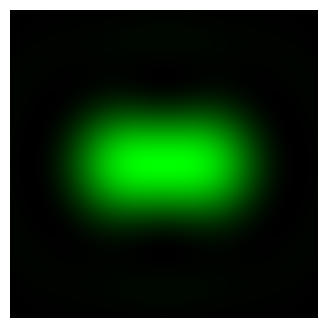

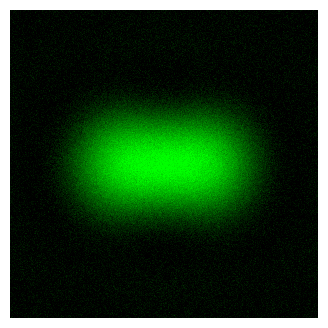

In [79]:
name = '2d_sparrow_low_res'

setup_frames_dir(name)


num_frames = 40

wavelength = 400 # nm
NA = .385
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)

rayleigh_dist = 0.61 * wavelength / 0.5
abbe_dist = 0.5 * wavelength / 0.5
sparrow_dist = 0.47 * wavelength / 0.5

seperation_distance = rayleigh_dist

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, seperation_distance, pixel_size)
vmin, vmax = two_point_convolved.min(), two_point_convolved.max()

# plot the convolved image
ax.imshow(two_point_convolved.T, cmap=green_cmap, extent=[0, size, 0, size], vmin=vmin, vmax=vmax, interpolation='none')
ax.axis('off')

fig.savefig(f"{save_dir}{name}.png")


SNR = 10 ** 3.5
name = '2d_sparrow_low_res_noisy'

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# this is calculating SNR in the same way as 1d stuff, not accounting for the fact that the image is 2d
noise = (1 / (SNR * num_pixels ** 2)) * random.normal(random.PRNGKey(onp.random.randint(10000)), 
    two_point_convolved.shape, np.float32)
two_point_noisy = two_point_convolved + noise

# plot the convolved image
ax.imshow(two_point_noisy.T, cmap=green_cmap, extent=[0, size, 0, size], vmin=vmin, vmax=vmax, interpolation='none')
ax.axis('off')

# save the current figure as a png
fig.savefig(f"{save_dir}{name}.png")


# Transition 2D to 1D



### Images to lines

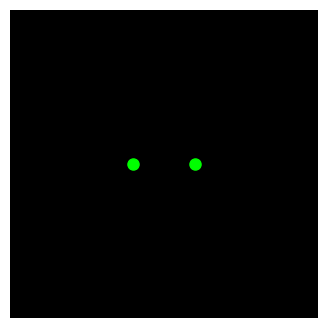

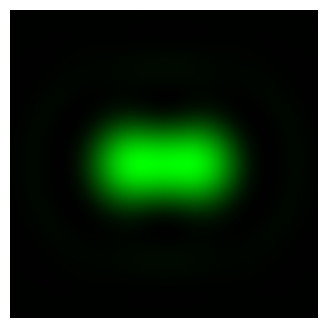

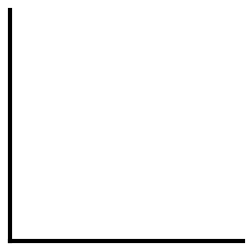

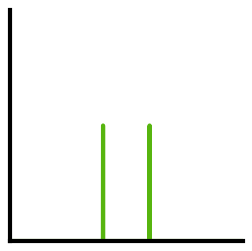

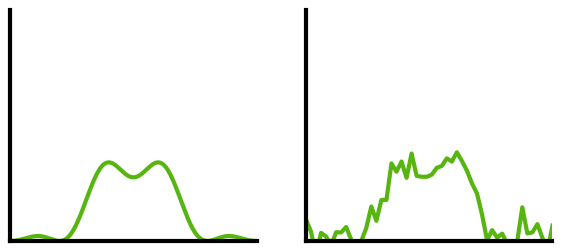

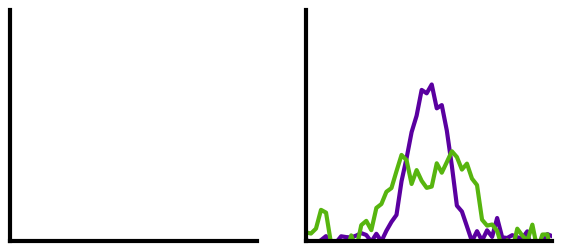

In [56]:
wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
snr=3
y_max = 0.15

abbe_dist = 0.5 * wavelength / NA
seperation_distance = abbe_dist

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# plot a black image of the same size
ax.imshow(np.zeros((num_pixels, num_pixels)), cmap=green_cmap, extent=[0, size, 0, size])
# plot two circles at the two points
ax.plot(size/2 - seperation_distance/2, size / 2, 'o', color=image_green, markersize=8)
ax.plot(size/2 + seperation_distance/2, size / 2, 'o', color=image_green, markersize=8)
ax.axis('off')
fig.savefig(save_dir + 'two_point.png', dpi=600)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))
(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, 
x, y, cropped_PSF) = simulate_optics_2d(wavelength, NA, size, seperation_distance, pixel_size)

# plot the convolved image
ax.imshow(dither_image(two_point_convolved.T), cmap=green_cmap,
          extent=[0, size, 0, size])


ax.axis('off')
fig.savefig(save_dir + 'two_point_convolved.png', dpi=600)


# same thing but in 1D

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
    x, cropped_PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


# empty axes
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.set(xlim=(x.min(), x.max()), ylim=(0, 1), yticks=[], xticks=[])
clear_spines(ax)
fig.savefig(save_dir + '1D_empty_object_ax.png', dpi=600)



fig, ax = plt.subplots(1, 1, figsize=(3, 3))
# ax.plot(x, one_point_object, get_color_cycle()[1])
ax.plot(x, two_point_object, get_color_cycle()[3], linewidth=3)
ax.set(xlim=(x.min(), x.max()), ylim=(0, 1), yticks=[], xticks=[])
clear_spines(ax)

fig.savefig(save_dir + '1D_two_point_object.png', dpi=600)


fig, ax = make_signal_and_measurement_plot(None, two_point_convolved, None, two_point_noiseless_pixels, x, snr, 
                                alpha=1, num_measurements=1,
                                y_max=y_max, darken_one=True, linewidth=3, label_axes=False)
fig.savefig(save_dir + '1D_two_point_convolved.png', dpi=600)


# make empty axes
fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                alpha=1, num_measurements=1,
                                y_max=y_max, darken_one=True, linewidth=3, label_axes=False)



# remove the lines
for line in ax[0].lines:
    line.set_linewidth(0)
fig.savefig(save_dir + '1D_empty_measurement_ax.png', dpi=600)


### simple lines to full model

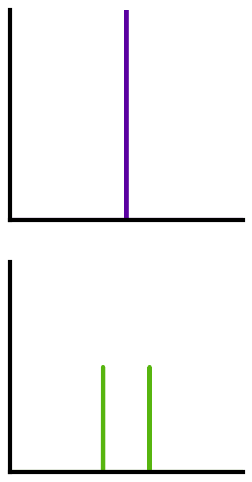

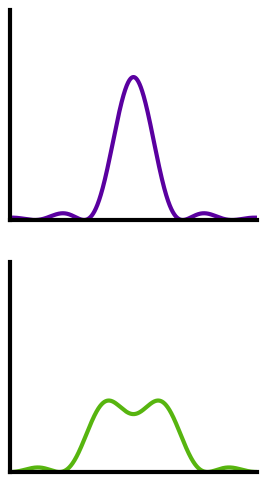

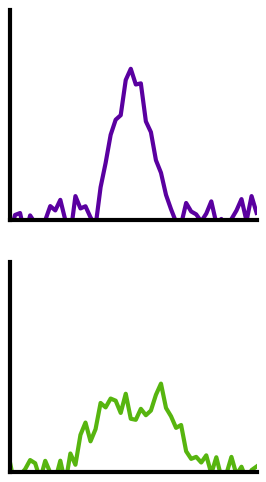

In [3]:
wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
snr=3
y_max = 0.15

abbe_dist = 0.5 * wavelength / NA
seperation_distance = abbe_dist


(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
    x, cropped_PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)



fig, ax = plt.subplots(2, 1, figsize=(3, 6), sharex=True)
ax[0].plot(x, one_point_object, get_color_cycle()[1], linewidth=3)
ax[1].plot(x, two_point_object, get_color_cycle()[3], linewidth=3)
ax[0].set(yticks=[], ylim=(0, 1))
ax[1].set(xlim=(x.min(), x.max()), ylim=(0, 1), yticks=[], xticks=[], )
clear_spines(ax)
fig.savefig(save_dir + '1D_two_point_object_seperate.png', dpi=600, transparent=True)


fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                alpha=1, num_measurements=1,
                                y_max=y_max, darken_one=True, seperate_rows=True, label_axes=False)
# delete the 2nd col axes
for a in ax[:, 1]:
    a.remove()
fig.savefig(save_dir + '1D_two_point_convolved_seperate.png', dpi=600, transparent=True)



fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                alpha=1, num_measurements=1,
                                y_max=y_max, darken_one=True, seperate_rows=True, label_axes=False)
# delete the 1sr col axes
for a in ax[:, 0]:
    a.remove()
fig.savefig(save_dir + '1D_two_point_noisy_seperate.png', dpi=600, transparent=True)


# 1D

### Noise animation

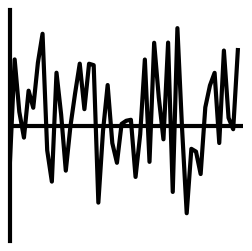

In [16]:
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size) 


fig, ax = plt.subplots(1, 1, figsize=(3, 3))
# make gaussian noise numpixels in size
noise = random.normal(random.PRNGKey(1), (num_pixels,))

ax.plot(noise, color='k', linewidth=3)
ax.axhline(0, color='k', linestyle='-', linewidth=3)
ax.set(xticks=[], yticks=[], xlim=(0, num_pixels), ylim=(-2.5, 2.5))
clear_spines(ax, leave='left')


fig.savefig(f"{save_dir}/noise_1d.png", dpi=600)


### Continuously looping noisy distribution

In [8]:
name = 'noise'
setup_frames_dir(name)

wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
snr = 3
y_max = 0.15

max_num_measurements = 60

abbe_dist = 0.5 * wavelength / NA
print(f"Abbe distance: {abbe_dist} nm")
seperation_distance = abbe_dist

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
  x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


num_measurements = int(1e5)
num_measurements_to_display = 1



def make_the_plot(index, darken_one):
  fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  alpha=0.05, num_measurements=1,
                                  y_max=y_max, darken_one=darken_one, linewidth=3, seperate_rows=True)
  
  # save the current figure
  fig.savefig(f"{save_dir}{name}/1d_noisy_measurements_{index:04d}.tiff")
  # close the figure
  plt.close(fig)


for index in tqdm(np.arange(1, max_num_measurements, 1)):
  one_point_noisy_measurement = get_noisy_measurements(one_point_noiseless_pixels, snr, max_num_measurements)
  two_point_noisy_measurement = get_noisy_measurements(two_point_noiseless_pixels, snr, max_num_measurements)
  make_the_plot(index, darken_one=True)
    

Abbe distance: 400.0 nm


100%|██████████| 59/59 [00:04<00:00, 12.18it/s]


In [9]:
!convert -delay 10 {save_dir}{name}/*.tiff -layers OptimizePlus -loop 0 {save_dir}{name}.gif

### High-D vectors and energy coords

Abbe distance: 400.0 nm


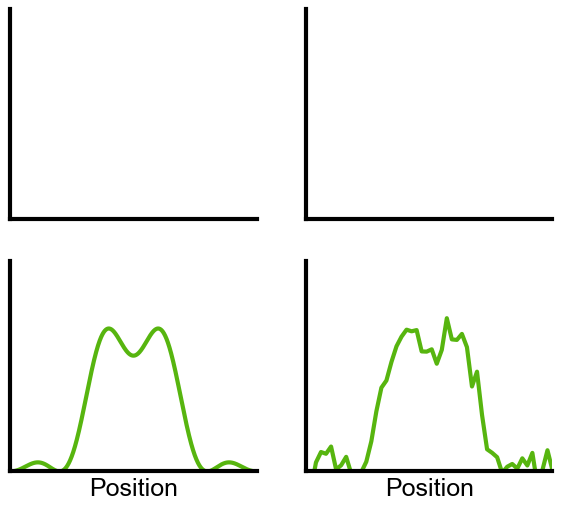

In [16]:
name = 'show_vector'

wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
snr = 3
y_max = 0.15

abbe_dist = 0.5 * wavelength / NA
print(f"Abbe distance: {abbe_dist} nm")
seperation_distance = abbe_dist

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
  x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)




fig, ax = make_signal_and_measurement_plot(None, 2 * two_point_convolved, None, 2 * two_point_noiseless_pixels, x, snr, 
                                alpha=0.05, num_measurements=1,
                                y_max=y_max, darken_one=True, linewidth=3, seperate_rows=True)


# # save the current figure
fig.savefig(f"{save_dir}{name}.pdf")

    

### Introduce energy coords

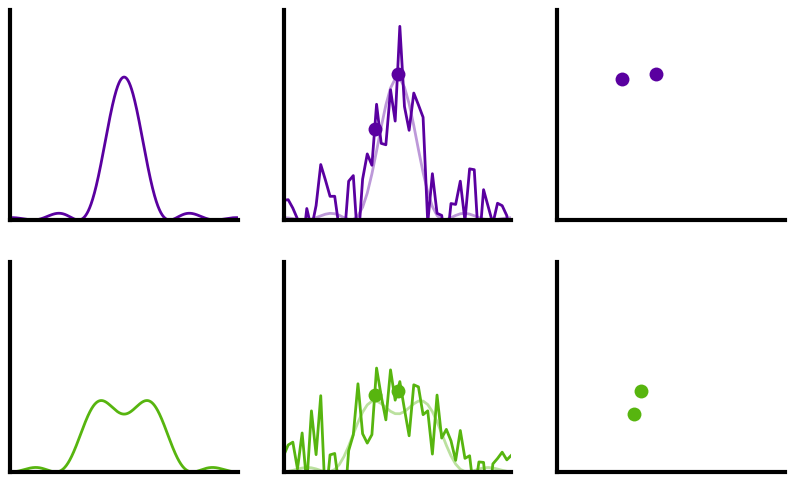

In [32]:
wavelength = 400 # nm
NA = .5
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
y_lim = 0.15
snr = 1

abbey_dist = 0.5 * wavelength / NA
seperation_distance = abbey_dist

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
  x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)

energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size), one_point_noiseless_pixels.shape[-1] / 2,)

seed = (5, 2)
one_point_noisy_measurement = get_noisy_measurements(one_point_noiseless_pixels, snr, 1, seed=seed[0])
two_point_noisy_measurement = get_noisy_measurements(two_point_noiseless_pixels, snr, 1, seed=seed[1])

# prepend the clean measuerements
one_point_noisy_measurement = onp.concatenate([[one_point_noiseless_pixels], one_point_noisy_measurement], axis=0)
two_point_noisy_measurement = onp.concatenate([[two_point_noiseless_pixels], two_point_noisy_measurement], axis=0)

fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                alpha=0.4, one_point_noisy_measurement=one_point_noisy_measurement, 
                                            two_point_noisy_measurement=two_point_noisy_measurement,
                                y_max=y_max, darken_one=True, linewidth=2, seperate_rows=True,
                                energy_coord_pixel_indices=energy_coord_pixel_indices, label_axes=False)
                                
ax[0, -1].set(xticks=[], yticks=[])
ax[1, -1].set(xticks=[], yticks=[])

# save the current figure as a png
fig.savefig(f"{save_dir}/energy_coord_intro.pdf")


### Build up a distribution in energy coords

In [47]:
name = 'noise_buildup_with_energy_coord'
setup_frames_dir(name)

wavelength = 400 # nm
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
max_num_measurements = 100


NA = 0.8
y_max = 0.23
snr = 0.55
abbe_dist = 0.5 * wavelength / 0.5 # abbe dist for 0.5 NA
seperation_distance = abbe_dist

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
  x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


one_point_noisy_measurement = get_noisy_measurements(one_point_noiseless_pixels, snr, max_num_measurements)
two_point_noisy_measurement = get_noisy_measurements(two_point_noiseless_pixels, snr, max_num_measurements)

def make_the_plot(num_to_use, darken_one):
  fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  alpha=0.02, ec_alpha=0.2,
                                  one_point_noisy_measurement=one_point_noisy_measurement[:num_to_use], two_point_noisy_measurement=two_point_noisy_measurement[:num_to_use],
                                  y_max=y_max, darken_one=darken_one, linewidth=3, 
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False
                                  
                                  )
  
  fig.savefig(f"{save_dir}{name}/1d_noisy_measurements_{num_to_use:04d}.tiff", dpi=300)
  plt.close(fig)


for num_to_use in tqdm(np.arange(1, max_num_measurements, 1)):
  make_the_plot(num_to_use, darken_one=True)
  
# dont show dark one on last one
make_the_plot(num_to_use, darken_one=False)  


100%|██████████| 99/99 [00:19<00:00,  5.04it/s]


In [48]:
# !convert -delay 10 {save_dir}{name}/*.tiff -layers OptimizePlus -loop 1 {save_dir}{name}.gif
!ffmpeg -y -framerate 10 -i '{save_dir}{name}/1d_noisy_measurements_%04d.tiff' -vcodec libx264 -crf 23 -pix_fmt yuv420p '{save_dir}{name}.mp4'


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

### Same as above, but with probability instead of samples

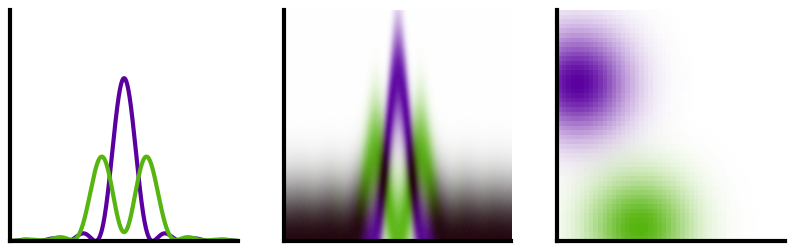

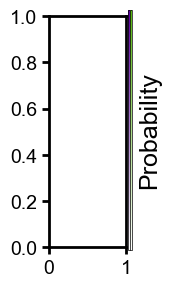

In [83]:
wavelength = 400 # nm
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)


NA = 0.8
y_max = 0.23
snr = 0.55
abbe_dist = 0.5 * wavelength / 0.5 # abbe dist for 0.5 NA
seperation_distance = abbe_dist


num_energy_coord_noisy_measurements = int(2e5)


(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
  x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


from animations.annimations_utils import make_signal_and_measurement_plot, plot_signal_spatial_distribution
fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                alpha=0.1,
                                num_measurements=1,
                                exact_densities=True,
                                y_max=y_max, darken_one=False, linewidth=3, dist_bins=50,
                                energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                  one_point_noiseless_pixels.shape[-1] / 2,),
                                                                  marker_size=8, do_plots='101', label_axes=False, 

                                
                                )


plot_signal_spatial_distribution(ax[1], x, one_point_convolved, two_point_convolved, snr,  y_max=ax[0].get_ylim()[1], 
                                 show_extent=None, show_labels=False,
                                  num_intensity_bins=80, num_measurements= num_energy_coord_noisy_measurements )                              




# save the current figure as a png
fig.savefig(f"{save_dir}/1d_noisy_measurements_with_ec_prob.png", dpi=600)


fig, ax = plt.subplots(1,1, figsize=(1, 3))
add_multiple_colorbars(ax, 
                       [LinearSegmentedColormap.from_list(f'cmap', [(1,1,1), purple]), 
                        LinearSegmentedColormap.from_list(f'cmap', [(1,1,1), green])])
fig.savefig(f"{save_dir}/purple_green_colorbars.pdf")


### Show black one and classification

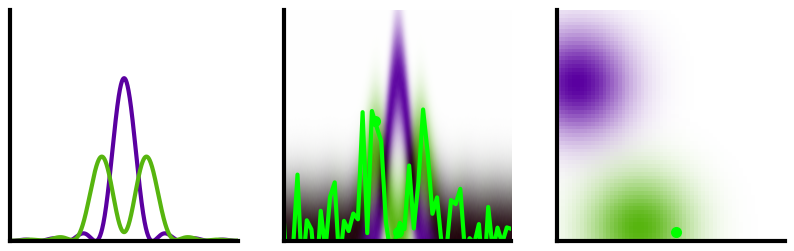

In [84]:
wavelength = 400 # nm
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
pixel_domain = np.linspace(x.min(), x.max(), num_pixels)


NA = 0.8
y_max = 0.23
snr = 0.55
abbe_dist = 0.5 * wavelength / 0.5 # abbe dist for 0.5 NA
seperation_distance = abbe_dist

high_res_high_noise_seed = 21113989949

num_energy_coord_noisy_measurements = int(3e5)

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
  x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                alpha=0.1,
                                num_measurements=1,
                                exact_densities=True, 
                                y_max=y_max, darken_one=False, linewidth=3,
                                energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                  one_point_noiseless_pixels.shape[-1] / 2,),
                                                                  marker_size=8,  label_axes=False, 
                                  do_plots='101'
                                )


plot_signal_spatial_distribution(ax[1], x, 
                                 one_point_convolved *  x.size / num_pixels,
                                  two_point_convolved * x.size / num_pixels,
                                 snr / x.size * num_pixels,
                                     y_max=ax[2].get_ylim()[1], 
                                  num_intensity_bins=80, num_measurements= num_energy_coord_noisy_measurements,
                                  show_labels=False
                                   )        


make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                alpha=1,
                                two_point_noisy_measurement=get_noisy_measurements(two_point_noiseless_pixels, snr, 1, seed=two_point_hi_res_seed),
                                y_max=y_max, darken_one=False, linewidth=3,
                                energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                  one_point_noiseless_pixels.shape[-1] / 2,),
                                                                  marker_size=8, label_axes=False,
                                  do_plots='010', figax=(fig, ax), colors=['lime', 'lime']
                                )


# save the current figure as a png
fig.savefig(f"{save_dir}/1d_noisy_measurements_with_ec_prob_single_black.png" , dpi=600)

### Decrease resoltion and show dist change

In [91]:
name = 'decrease_resolution_energy_coord'
setup_frames_dir(name)


wavelength = 400 # nm
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
pixel_domain = np.linspace(x.min(), x.max(), num_pixels)


y_max = 0.23
# snr = 0.4
snr = 0.55
abbe_dist = 0.5 * wavelength / 0.5 # abbe dist for 0.5 NA
seperation_distance = abbe_dist

NAs = np.linspace(0.8, 0.42, 150)

NAs = np.concatenate([NAs, np.ones(60) * NAs[-1]])

seeds = (onp.arange(NAs.size) + 11234) // 3
seeds[0] = high_res_high_noise_seed 

low_res_high_noise_seed = 43928462
seeds[-1] = low_res_high_noise_seed

def make_the_plot(index, NA, seed):
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
    x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


  fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  num_measurements=1,
                                  exact_densities=True, 
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='101', seed=seed
                                  )


  # random sample a one point or two point measurement
  make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  alpha=1,
                                  two_point_noisy_measurement=get_noisy_measurements(two_point_noiseless_pixels, snr, 1, seed=seed),
                                  one_point_noisy_measurement=get_noisy_measurements(one_point_noiseless_pixels, snr, 1, seed=seed+ 1004),
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='010', figax=(fig, ax), 
                                    outline_markers=True,
                                  )
  
  fig.savefig(f"{save_dir}{name}/plot_{index:04d}.tiff", dpi=300)
  plt.close(fig)


for i, (NA, seed) in tqdm(enumerate(zip(NAs, seeds))):
  make_the_plot(i, NA, seed=seed)
  last_res_decrease_seed = seed
  
# hi_res_hi_noise_seed = seed

for NA in [NAs[0], NAs[-1]]:
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
      x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)

  mi = estimate_2_point_1_point_mi(one_point_noiseless_pixels, two_point_noiseless_pixels, snr, num_measurements=int(1e6))
  print(f'mi {mi}')

210it [00:20, 10.32it/s]


final mi 1.0038613080978394
final mi 0.7685890793800354


In [92]:
# !convert -delay 10 {save_dir}{name}/*.tiff -dither None -layers OptimizePlus -loop 1 {save_dir}{name}.gif 
!ffmpeg -y -framerate 30 -i '{save_dir}{name}/plot_%04d.tiff' -vcodec libx264 -crf 23 -pix_fmt yuv420p '{save_dir}{name}.mp4'


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

### change noise and show distribution change

In [93]:
name = 'decrease_noise_energy_coord'
setup_frames_dir(name)


wavelength = 400 # nm
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
pixel_domain = np.linspace(x.min(), x.max(), num_pixels)


NA = 0.42
y_max = 0.23
abbe_dist = 0.5 * wavelength / 0.5 # abbe dist for 0.5 NA
seperation_distance = abbe_dist

SNRs = np.logspace(np.log10(0.55), np.log10(2), 150)
SNRs = np.concatenate([SNRs, np.ones(60) * SNRs[-1]])

seeds = (onp.arange(SNRs.size) + 1000) // 3
seeds[0] = last_res_decrease_seed
low_res_low_noise_seed = seeds[-1]


def make_the_plot(index, snr, seed):
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
    x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


  fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  num_measurements=1,
                                  exact_densities=True, 
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='101', seed=seed
                                  )


  # random sample a one point or two point measurement
  make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  alpha=1,
                                  two_point_noisy_measurement=get_noisy_measurements(two_point_noiseless_pixels, snr, 1, seed=seed),
                                  one_point_noisy_measurement=get_noisy_measurements(one_point_noiseless_pixels, snr, 1, seed=seed+1004),
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='010', figax=(fig, ax), 
                                    outline_markers=True,
                                  )
  
  fig.savefig(f"{save_dir}{name}/plot_{index:04d}.tiff", dpi=300)
  plt.close(fig)


for i, (SNR, seed) in tqdm(enumerate(zip(SNRs, seeds))):
  make_the_plot(i, SNR, seed=seed)
  

210it [00:19, 10.52it/s]


In [94]:
# !convert -delay 10 {save_dir}{name}/*.tiff  -layers OptimizePlus -loop 1 {save_dir}{name}.gif
!ffmpeg -y -framerate 30 -i '{save_dir}{name}/plot_%04d.tiff' -vcodec libx264 -crf 23 -pix_fmt yuv420p '{save_dir}{name}.mp4'


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

### Show three cases hi-res/low-res and high noise low noise on same scale

In [65]:
y_max = 0.23

def do_plot(seed, NA, snr):
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
    x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


  fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  num_measurements=1,
                                  exact_densities=True,
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='101', seed=seed
                                  )

  # random sample a one point or two point measurement
  make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  alpha=1,
                                  two_point_noisy_measurement=get_noisy_measurements(two_point_noiseless_pixels, snr, 1, seed=seed),
                                  one_point_noisy_measurement=get_noisy_measurements(one_point_noiseless_pixels, snr, 1, seed=seed+1004),
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='010', figax=(fig, ax), 
                                    outline_markers=True,
                                  )
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
      x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)

  mi = estimate_2_point_1_point_mi(one_point_noiseless_pixels, two_point_noiseless_pixels, snr, num_measurements=int(3e6))
  print(f'mi {mi}')
  
  return fig


fig = do_plot(low_res_low_noise_seed, NAs[-1], SNRs[-1])
fig.savefig(f"{save_dir}/tradoff_low_res_low_noise.png", dpi=600)

fig = do_plot(high_res_high_noise_seed, NAs[0], SNRs[0])
fig.savefig(f"{save_dir}/tradoff_high_res_high_noise.png", dpi=600)

fig = do_plot(low_res_high_noise_seed, NAs[-1], SNRs[0])
fig.savefig(f"{save_dir}/low_res_high_noise.png", dpi=600)


NameError: name 'low_res_low_noise_seed' is not defined

### compute information for these 3 cases


In [21]:
hi_noise_snr = SNRs[0]
low_noise_snr = SNRs[-1]
hi_resolution_NA = NAs[-1]
low_resolution_NA = NAs[0]

for snr, NA, label in [(hi_noise_snr, hi_resolution_NA, 'Hi res high noise'),
                       (hi_noise_snr, low_resolution_NA, 'Low res high noise'),
                        (low_noise_snr, low_resolution_NA, 'Low res low noise')]:
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
    x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)

  mi = estimate_2_point_1_point_mi(one_point_noiseless_pixels, two_point_noiseless_pixels, snr, num_measurements=int(1e6))
  print(f"{label}: {mi}")


Hi res high noise: 0.9886608123779297
Low res high noise: 0.9903998970985413
Low res low noise: 0.08795055001974106


### compute SNR - NA grid

In [2]:

N_bins = 40

num_measurements = int(1e6)
# num_measurements = int(3e4)

wavelength = 400 # nm
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)

abbe_dist = 0.5 * wavelength / 0.5
seperation_distance = abbe_dist

SNRs = np.logspace(np.log10(0.05), np.log10(10), N_bins, base=10)

rayleigh_resolutions = np.linspace(600, 50, N_bins)
NAs = 0.5 * wavelength / rayleigh_resolutions


results = onp.zeros((len(SNRs), len(NAs)))
for i, snr in tqdm(enumerate(SNRs), total=len(SNRs)):
    for j, na in enumerate(NAs):
        (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
          x, PSF) = simulate_optics(wavelength, na, size, seperation_distance, pixel_size=pixel_size)
        mi = estimate_2_point_1_point_mi(one_point_noiseless_pixels, two_point_noiseless_pixels, snr, num_measurements=num_measurements)
        results[i, j] = mi

results = np.array(results)

100%|██████████| 40/40 [56:03<00:00, 84.08s/it]


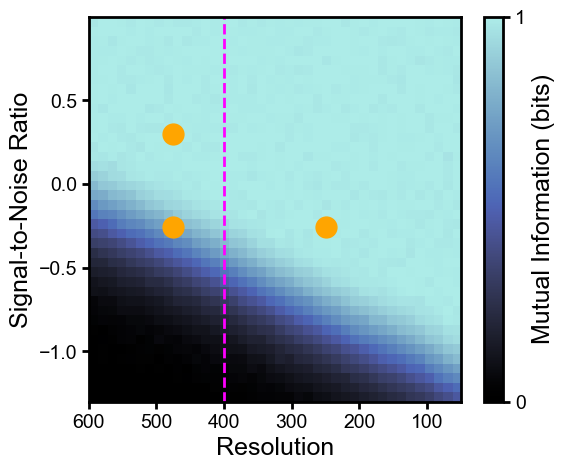

In [4]:

# copied from above
SNRs_points = np.logspace(np.log10(0.55), np.log10(2), 150)
NAs_points = np.linspace(0.8, 0.42, 150)

import cmasher as cmr
cmap = cmr.sapphire
red = get_color_cycle()[2]

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
cax = ax.imshow(results, cmap=cmap, origin='lower', vmin=0, vmax=1,
                 extent=[rayleigh_resolutions[0], rayleigh_resolutions[-1], np.log10(SNRs[0]), np.log10(SNRs[-1])], aspect='auto')
        #     aspect= (NAs[1] - NAs[0]) / (SNRs[1] - SNRs[0]))
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Mutual Information (bits)')
# set color bar labels to 0, 1
cbar.set_ticks([0, 1])

snr_exp_low = [0]
snr_exp_high = np.round(np.log10(SNRs))[-1]

# make a ytick for every power of 10 in SNRs
ytick_labels = [f'10^{np.round(np.log10(snr))}' if 
                np.abs(np.round(np.log10(snr)) - np.log10(snr)) < 0.001 else '' for snr in SNRs]

_ = ax.set(xlabel='Resolution', ylabel='Signal-to-Noise Ratio',                   
                #   yticks=np.arange(len(SNRs)),
                #   yticklabels=ytick_labels
                  )




low_NA = NAs_points.min()
hi_NA = NAs_points.max()
low_snr = SNRs_points.min()
hi_snr = SNRs_points.max()

low_rayleigh_res = wavelength / (2 * low_NA)
hi_rayleigh_res = wavelength / (2 * hi_NA)

# # # plot red points for each of these
# def plot_point(na, snr):
#     ax.plot((na - NAs.min()) / (NAs.max() - NAs.min()) * NAs.size, 
#                 (np.log10(snr) - np.log10(SNRs.min())) / (np.log10(SNRs.max()) - np.log10(SNRs.min())) * SNRs.size, 
#                 'o', color=red, markersize=10)

ax.plot(low_rayleigh_res, np.log10(low_snr), 'o', color='orange', markersize=15)
ax.plot(low_rayleigh_res, np.log10(hi_snr), 'o', color='orange', markersize=15)
ax.plot(hi_rayleigh_res, np.log10(low_snr), 'o', color='orange', markersize=15)

# plot vertical line at seperation distance needed for rayleigh criterion
ax.axvline(seperation_distance, color='magenta', linestyle='--', linewidth=2)

(one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
          x, PSF) = simulate_optics(wavelength, na, size, seperation_distance, pixel_size=pixel_size)
estimate_2_point_1_point_mi(one_point_noiseless_pixels, two_point_noiseless_pixels, low_snr, num_measurements=int(1e6))

fig.savefig(f"{save_dir}/mi_vs_snr_res_main_paper.pdf", dpi=600, transparent=True)

### For figure 1 in main paper


mi 0.9944504499435425
mi 0.9950228333473206
mi 0.7643514275550842


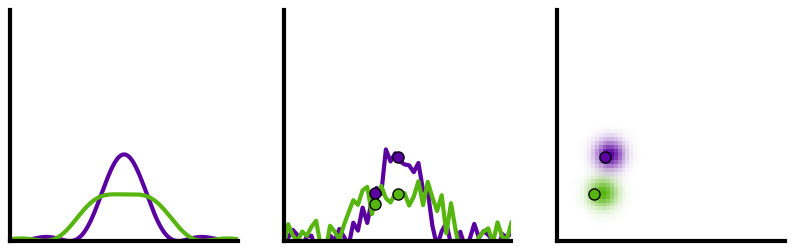

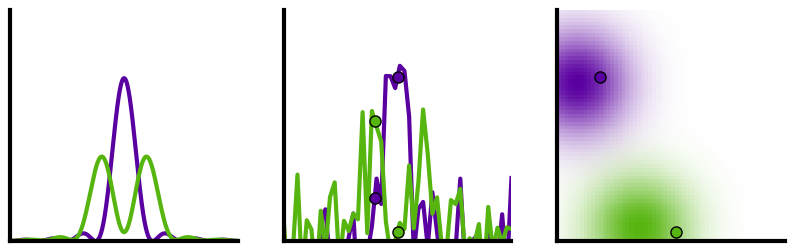

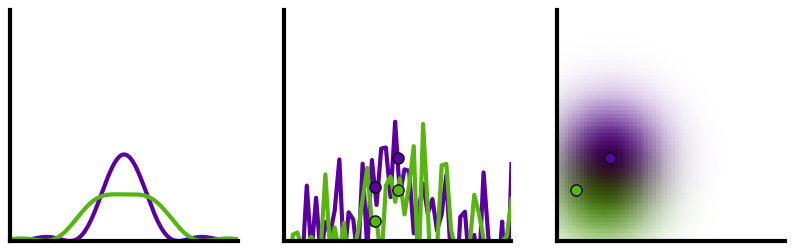

In [9]:

wavelength = 400 # nm
pixel_size = 40 # nm
size = 2000 # nm
num_pixels = int(size / pixel_size)
# pixel_domain = np.linspace(x.min(), x.max(), num_pixels)


NA = 0.42
y_max = 0.23
abbe_dist = 0.5 * wavelength / 0.5 # abbe dist for 0.5 NA
seperation_distance = abbe_dist

SNRs = np.logspace(np.log10(0.55), np.log10(2), 150)
SNRs = np.concatenate([SNRs, np.ones(60) * SNRs[-1]])
NAs = np.linspace(0.8, 0.42, 150)
NAs = np.concatenate([NAs, np.ones(60) * NAs[-1]])


y_max = 0.23

def do_plot(seed, NA, snr):
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
    x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)


  fig, ax = make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  num_measurements=1,
                                  exact_densities=True,
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='101', seed=seed
                                  )

  # random sample a one point or two point measurement
  make_signal_and_measurement_plot(one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels, x, snr, 
                                  alpha=1,
                                  two_point_noisy_measurement=get_noisy_measurements(two_point_noiseless_pixels, snr, 1, seed=seed),
                                  one_point_noisy_measurement=get_noisy_measurements(one_point_noiseless_pixels, snr, 1, seed=seed+1004),
                                  y_max=y_max, darken_one=False, linewidth=3,
                                  energy_coord_pixel_indices= (one_point_noiseless_pixels.shape[-1] / 2 - (seperation_distance / 2 / pixel_size),
                                                                    one_point_noiseless_pixels.shape[-1] / 2,),
                                                                    marker_size=8, label_axes=False,
                                    do_plots='010', figax=(fig, ax), 
                                    outline_markers=True,
                                  )
  (one_point_object, two_point_object, one_point_convolved, two_point_convolved, one_point_noiseless_pixels, two_point_noiseless_pixels,
      x, PSF) = simulate_optics(wavelength, NA, size, seperation_distance, pixel_size)

  mi = estimate_2_point_1_point_mi(one_point_noiseless_pixels, two_point_noiseless_pixels, snr, num_measurements=int(3e6))
  print(f'mi {mi}')
  
  return fig


fig = do_plot(1, NAs[-1], SNRs[-1])
fig.savefig(f"{save_dir}/fig1_tradoff_low_res_low_noise.pdf", dpi=600)

high_res_high_noise_seed = 21113989949
fig = do_plot(high_res_high_noise_seed, NAs[0], SNRs[0])
fig.savefig(f"{save_dir}/fig1_tradoff_high_res_high_noise.pdf", dpi=600)

fig = do_plot(1000, NAs[-1], SNRs[0])
fig.savefig(f"{save_dir}/fig1_low_res_high_noise.pdf", dpi=600)


# 2D cell images figures

### Make a noise image 

100%|██████████| 40/40 [00:00<00:00, 50.71it/s]


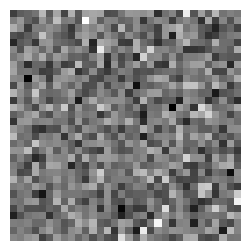

In [5]:
# make a 128x 128 Gaussian noise image and plot in inferno

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(random.normal(random.PRNGKey(0), (32, 32)), cmap='gray', interpolation='none')
ax.axis('off')

fig.savefig(f"{save_dir}/noise_inferno.png", dpi=600)

name = 'noise_inferno'

setup_frames_dir(name)

num_frames = 40

for i in tqdm(range(num_frames)):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.imshow(random.normal(random.PRNGKey(i), (84, 84)), cmap='inferno', interpolation='none')
    ax.axis('off')
    fig.savefig(f"{save_dir}{name}/plot_{i:04d}.tiff")
    plt.close(fig)

!convert -delay 10 {save_dir}{name}/*.tiff -layers OptimizePlus -loop 1 {save_dir}{name}.gif

100%|██████████| 30/30 [00:02<00:00, 13.26it/s]


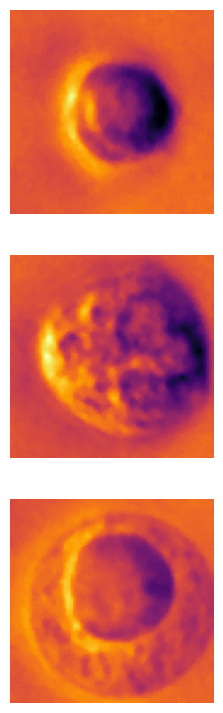

In [6]:
# indices = [37, 24, 0] # These ones are good for showing encoders in LED array and DPC (figure 1)
indices = [21, 36, 115] # these have images that look different
photon_frac = 0.015
num_frames = 30
name = 'noisy_DPC_images'

setup_frames_dir(name)

images = load_bsccm_images(bsccm, 'DPC_Right', indices=indices, convert_units_to_photons=True, median_filter=True,
                           edge_crop=22)

# get vmin and vmax for all images
vmin = np.min(images) * photon_frac
vmax = np.max(images) * photon_frac

# save noiseless version
fig, axes = plt.subplots(3, 1, figsize=(3, 9))
for index, ax in zip(range(len(indices)), axes):
    image = images[index] * photon_frac
    ax.imshow(image, cmap='inferno', vmin=vmin, vmax=vmax)
    ax.axis('off')

fig.savefig(f"{save_dir}/noiseless_DPC_images.png", transparent=True)


for frame_num in tqdm(range(num_frames)):
    fig, axes = plt.subplots(3, 1, figsize=(3, 9))
    for index, ax in zip(range(len(indices)), axes):
        image = images[index]
        noisy_image = add_noise(image * photon_frac)
        ax.imshow(noisy_image, cmap='inferno', vmin=vmin, vmax=vmax)
        ax.axis('off')


    fig.savefig(f"{save_dir}/{name}/image_{frame_num:04d}.tiff")
    plt.close(fig) 

In [7]:
!convert -delay 10 {save_dir}{name}/*.tiff -dispose previous -transparent white -layers OptimizePlus -loop 0 {save_dir}{name}.gif

### Noisy instance of single image

In [7]:


magenta_cmap = LinearSegmentedColormap.from_list(f'cmap_magenta', [(1,1,1), get_color_cycle()[4]])
green_cmap = LinearSegmentedColormap.from_list(f'cmap_green', [(1,1,1), get_color_cycle()[3]])
purple_cmap = LinearSegmentedColormap.from_list(f'cmap_purple', [(1,1,1), get_color_cycle()[1]])

point_centers = np.array([[0.396 , 0.4845],
       [0.4965, 0.537 ],
       [0.6125, 0.442 ]])

indices = [21, 36, 115] # these have images that look different

num_frames = 100
gaussian_noise_sigma = np.logspace(0, 1.5, num_frames)
display_sigma = np.logspace(-4, np.log10(0.025), num_frames)
mean_photons_per_pixel = 50

name = 'changing_noise_image'
name2 = 'changing_noise_density'

setup_frames_dir(name)
setup_frames_dir(name2)

images = load_bsccm_images(bsccm, 'DPC_Right', indices=indices, convert_units_to_photons=True, median_filter=True,
                           edge_crop=22)
images = images * mean_photons_per_pixel / np.mean(images)

# get vmin and vmax for all images
# vmin = np.min(images)
# vmax = np.max(images)
vmin, vmax = 18, 74


for frame_num in tqdm(range(num_frames)):
    fig, ax = plt.subplots(3, 1, figsize=(3, 9))
    for i, color in enumerate([purple, magenta, green]):
        noisy_image = add_noise(images[i], gaussian_sigma=gaussian_noise_sigma[frame_num])
        imshow_with_border(ax[i], noisy_image, color=color, vmin=vmin, vmax=vmax)
    fig.savefig(f"{save_dir}/{name}/image_{frame_num:04d}.tiff")
    plt.close(fig)


    # plot a 2d gaussian density
    cov = np.eye(2) * display_sigma[frame_num]

    densities = []
    x = np.linspace(0.2, 0.8, 100)
    y = np.linspace(0.2, 0.8, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    for mu in point_centers:
        prob = multivariate_normal.pdf(pos, mu, cov)
        prob /= np.max(prob)
        densities.append(prob)

    blended_color = np.prod(np.stack([cmap(hist) for cmap, hist in 
                                      zip([magenta_cmap, green_cmap, purple_cmap], densities)], axis=0), axis=0)

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    # flip vertically
    ax.imshow(blended_color, origin='lower')
    clear_spines(ax)
    ax.set(xticks=[], yticks=[])

    fig.savefig(f"{save_dir}/{name2}/image_{frame_num:04d}.tiff")
    plt.close(fig)
    

100%|██████████| 100/100 [00:11<00:00,  8.75it/s]


In [14]:
!ffmpeg -y -framerate 20 -i '{save_dir}{name}/image_%04d.tiff' -filter_complex "[0:v]split[base][rev];[rev]reverse[r];[base][r]concat=n=2:v=1:a=0" -vcodec libx264 -crf 23 -pix_fmt yuv420p '{save_dir}{name}.mp4'
!ffmpeg -y -framerate 20 -i '{save_dir}{name2}/image_%04d.tiff' -filter_complex "[0:v]split[base][rev];[rev]reverse[r];[base][r]concat=n=2:v=1:a=0" -vcodec libx264 -crf 23 -pix_fmt yuv420p '{save_dir}{name2}.mp4'

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

### Vectorized images

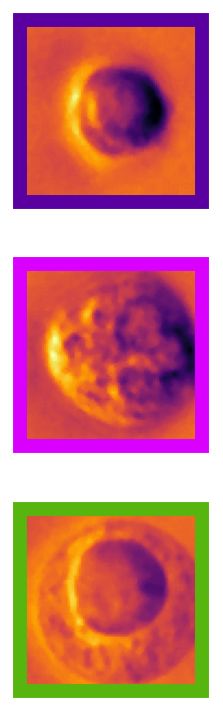

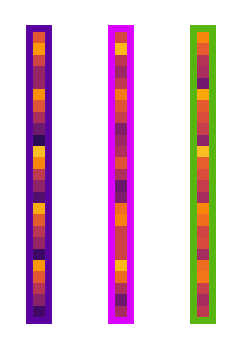

In [8]:
indices = [21, 36, 115] # these have images that look different

images = load_bsccm_images(bsccm, 'DPC_Right', indices=indices, convert_units_to_photons=True, median_filter=True,
                           edge_crop=22)

# get vmin and vmax for all images
vmin = np.min(images)
vmax = np.max(images)
# vmin, vmax = 18, 74


# plot the three images
fig, ax = plt.subplots(3, 1, figsize=(3, 9))
for i, color in enumerate([purple, magenta, green]):
    imshow_with_border(ax[i], images[i], color=color, vmin=vmin, vmax=vmax)

step = 8
# take the center 8x8 square and turn it into a vector for each image
vectors = images[:, 84 // 2 - 20: 84 // 2 + 20:step, 84 // 2 - 20: 84 // 2 + 20:step].reshape(3, -1, 1)

# plot each vector as an image
fig, ax = plt.subplots(1, 3, figsize=(3, 9))
for i, color in enumerate([purple, magenta, green]):
    imshow_with_border(ax[i], vectors[i], color=color, vmin=vmin, vmax=vmax, border_width=5, border_shift=0.3)

fig.savefig(f"{save_dir}/vector_images.pdf", dpi=600, transparent=True)
    

### Show good vs bad encoder

  0%|          | 0/100 [00:00<?, ?it/s]


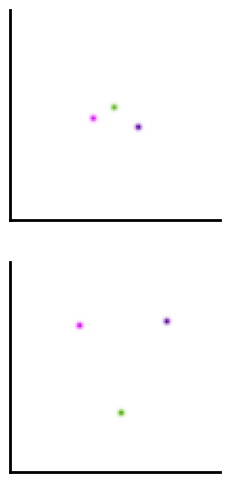

In [12]:
num_frames = 100
name = 'noisy_encoder_comparison'
name2 = 'noisy_encoder_comparison_density'

setup_frames_dir(name)
setup_frames_dir(name2)

indices = [21, 36, 115] # these are different looking cells

vmin, vmax = 0, 100
mean_photons_per_pixel = 50

gaussian_noise_sigma = np.logspace(0, 1.5, num_frames)
display_sigma = np.logspace(-4, np.log10(0.025), num_frames)


point_centers = np.array([[0.396 , 0.4845],
       [0.4965, 0.537 ],
       [0.6125, 0.442 ]])

# coherent point centers
coherent_point_centers = onp.array([[.33, 0.7], [.53, .28], [.75, .72],])

point_centers = np.stack([point_centers, coherent_point_centers])

channels = ['DPC_Right', 'LED119']

images_by_channel = {}
for channel in channels:
    images = load_bsccm_images(bsccm, channel, indices=indices, convert_units_to_photons=True, median_filter=True,
                        edge_crop=22)
    images = images * mean_photons_per_pixel / np.mean(images)
    images_by_channel[channel] = images


for frame_num in tqdm(range(num_frames)):
    fig, ax = plt.subplots(2, 3, figsize=(9, 6))
    for i, channel in enumerate(channels):
        for j in range(len(images)):
            image = images_by_channel[channel][j]
            image = add_noise(image, gaussian_sigma=gaussian_noise_sigma[frame_num])

            imshow_with_border(ax[i, j], image, [purple, magenta, green][j], vmin=vmin, vmax=vmax)
    fig.savefig(f"{save_dir}/{name}/image_{frame_num:04d}.tiff")
    plt.close(fig)


    fig, ax = plt.subplots(2, 1, figsize=(3, 6))
    for i, channel in enumerate(channels):

        # plot a 2d gaussian density
        cov = np.eye(2) * display_sigma[frame_num]

        densities = []
        x = np.linspace(0, 1, 100)
        y = np.linspace(0, 1, 100)
        X, Y = np.meshgrid(x, y)
        pos = np.dstack((X, Y))
        for mu in point_centers[i]:
            prob = multivariate_normal.pdf(pos, mu, cov)
            prob /= np.max(prob)
            densities.append(prob)

        blended_color = np.prod(np.stack([cmap(hist) for cmap, hist in 
                                        zip([magenta_cmap, green_cmap, purple_cmap], densities)], axis=0), axis=0)

        # flip vertically
        ax[i].imshow(blended_color, origin='lower')
        clear_spines(ax[i])
        ax[i].set(xticks=[], yticks=[])

    fig.savefig(f"{save_dir}/{name2}/image_{frame_num:04d}.tiff")
    plt.close(fig)
    


In [16]:
!ffmpeg -y -framerate 20 -i '{save_dir}{name}/image_%04d.tiff' -filter_complex "[0:v]split[base][rev];[rev]reverse[r];[base][r]concat=n=2:v=1:a=0" -vcodec libx264 -crf 23 -pix_fmt yuv420p '{save_dir}{name}.mp4'
!ffmpeg -y -framerate 20 -i '{save_dir}{name2}/image_%04d.tiff' -filter_complex "[0:v]split[base][rev];[rev]reverse[r];[base][r]concat=n=2:v=1:a=0" -vcodec libx264 -crf 23 -pix_fmt yuv420p '{save_dir}{name2}.mp4'

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

### Static images of DPC and LED in same contrast

In [10]:
indices = [21, 36, 115] # these are different looking cells

vmin, vmax = 0, 100
mean_photons_per_pixel = 50

gaussian_noise_sigma = 8

channels = ['DPC_Right', 'LED119']

images_by_channel = {}
for channel in channels:
    images = load_bsccm_images(bsccm, channel, indices=indices, convert_units_to_photons=True, median_filter=True,
                        edge_crop=22)
    images = images * mean_photons_per_pixel / np.mean(images)
    images_by_channel[channel] = images


for i, channel in enumerate(channels):
    for j in range(len(images)):
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        image = images_by_channel[channel][j]
        imshow_with_border(ax, image, [purple, magenta, green][j], vmin=vmin, vmax=vmax, border_width=11)
        fig.savefig(f"{save_dir}/single_image_same_contrast_clean{channel}{j}.png", transparent=True)
        plt.close(fig)

        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        image = add_noise(image, gaussian_sigma=gaussian_noise_sigma)
        imshow_with_border(ax, image, [purple, magenta, green][j], vmin=vmin, vmax=vmax, border_width=11)
        fig.savefig(f"{save_dir}/single_image_same_contrast_noisy{channel}{j}.png", transparent=True)
        plt.close(fig)

### GIFs of noisy DPC low contrast

In [28]:


num_frames = 50

indices = [21, 36, 115] # these are different looking cells

vmin, vmax = 0, 100
mean_photons_per_pixel = 50

gaussian_noise_sigma = 8

channel = 'DPC_Right'

images = load_bsccm_images(bsccm, channel, indices=indices, convert_units_to_photons=True, median_filter=True,
                    edge_crop=22)
images = images * mean_photons_per_pixel / np.mean(images)
    


for image_number, image in enumerate(images):
    name = f'low_contrast_dpc_{image_number}'
    setup_frames_dir(name)


    for i in tqdm(range(num_frames)):
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))

        noisy_image = add_noise(image, gaussian_sigma=gaussian_noise_sigma)
        imshow_with_border(ax, noisy_image, [purple, magenta, green][image_number], vmin=vmin, vmax=vmax, border_width=11)

        fig.savefig(f"{save_dir}/{name}/image_{i:04d}.tiff", transparent=True)
        plt.close(fig)

100%|██████████| 50/50 [00:01<00:00, 42.35it/s]


In [29]:
!convert -delay 5 {save_dir}low_contrast_dpc_0/*.tiff -dispose previous -transparent white -layers OptimizePlus -loop 0 {save_dir}low_contrast_dpc_0.gif
!convert -delay 5 {save_dir}low_contrast_dpc_1/*.tiff -dispose previous -transparent white -layers OptimizePlus -loop 0 {save_dir}low_contrast_dpc_1.gif
!convert -delay 5 {save_dir}low_contrast_dpc_2/*.tiff -dispose previous -transparent white -layers OptimizePlus -loop 0 {save_dir}low_contrast_dpc_2.gif